1. Installing Required Python Packages

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install lightgbm
!pip install matplotlib
!pip install seaborn

2. Machine Learning Model Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# ML models
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Ensemble method already used:
import lightgbm as lgb


3. Data Preprocessing for Loan Status Prediction

In [3]:
# Load the data
df = pd.read_csv("train.csv")

# Drop ID column and rows with missing values
if 'id' in df.columns:
    df = df.drop('id', axis=1)
df = df.dropna()

# Split features and target
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()  
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()   

# Define a column transformer for preprocessing
# Include both categorical and numerical preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # One-hot encode categorical features
], remainder='drop')  # Drop any remaining columns not specified

4. Visualization Setup

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Optional: Ensure the plot displays (useful in some environments)
plt.show()

5. Displaying DataFrame Preview

In [ ]:
# Display the first 5 rows of the DataFrame with all columns visible
pd.set_option('display.max_columns', None)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


6. Exploratory Data Analysis (EDA)

In [6]:
# Explore dataset structure and initial insights
print("Shape of the loan dataset (rows, columns):", df.shape)
print("\nData types of loan features:\n", df.dtypes)
print("\nCount of missing values per column:\n", df.isnull().sum())
print("\nSummary statistics for loan data:\n", df.describe(include='all'))

Shape of the loan dataset (rows, columns): (58645, 12)

Data types of loan features:
 person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

Count of missing values per column:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Summary 

7. Visualizing Missing Data Patterns

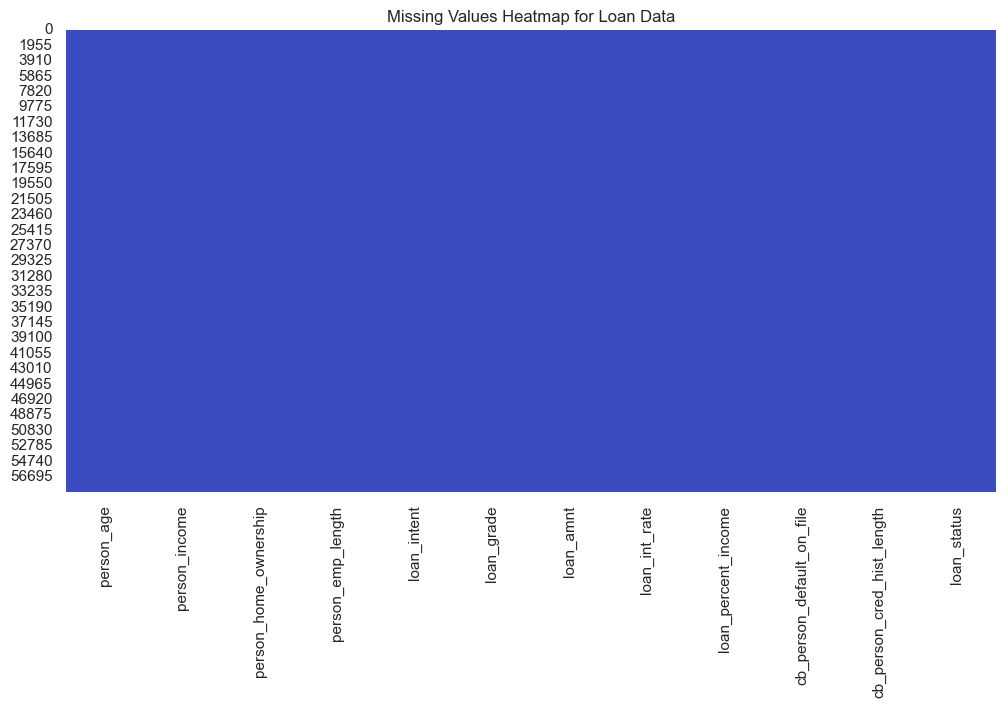

In [7]:
# Visualize missing data patterns in loan dataset
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap for Loan Data")
plt.show()

8. Analyzing Numerical Feature Distributions

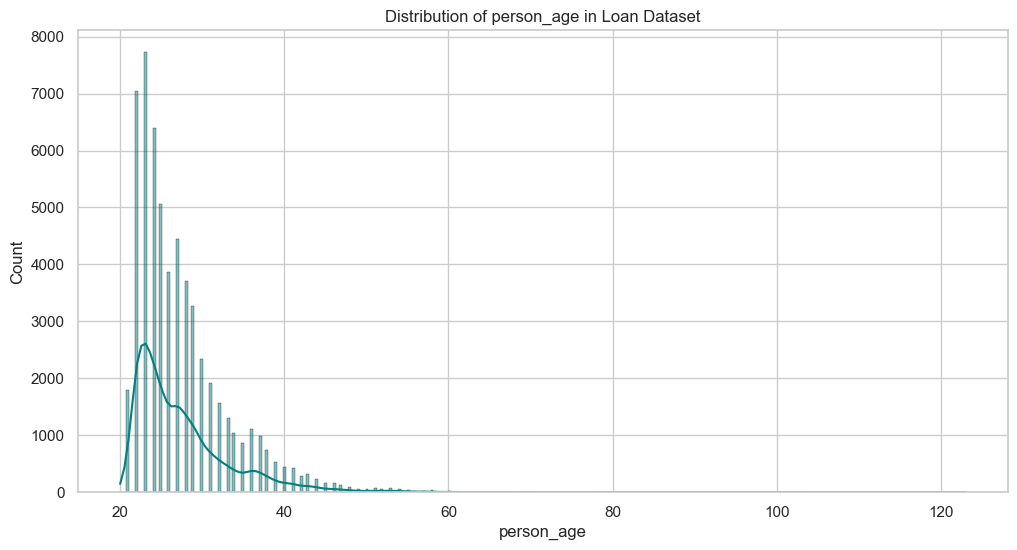

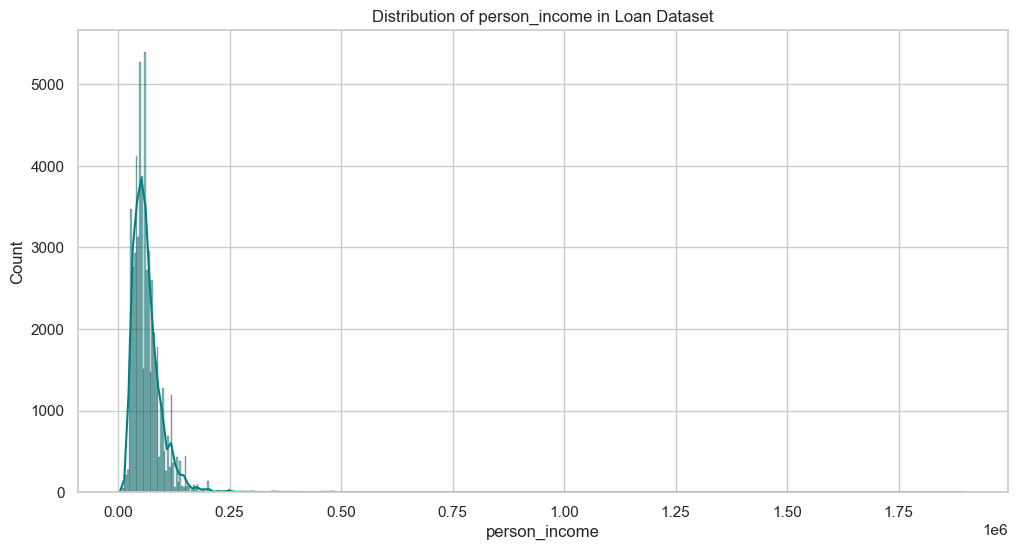

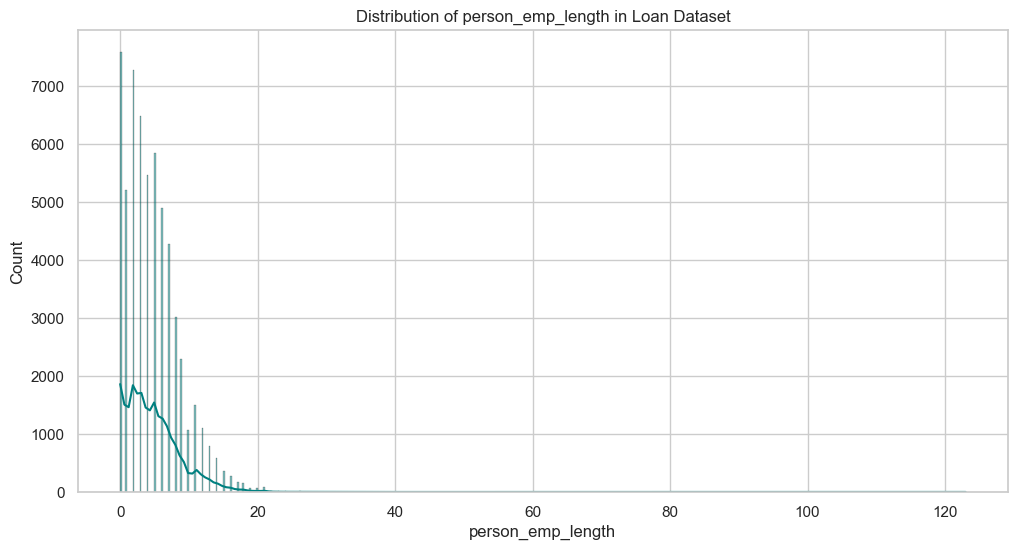

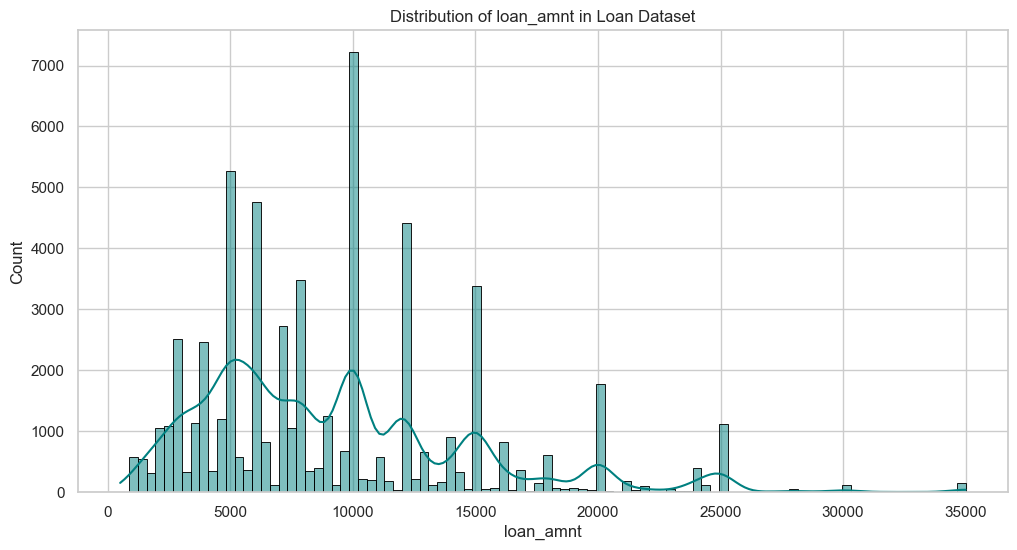

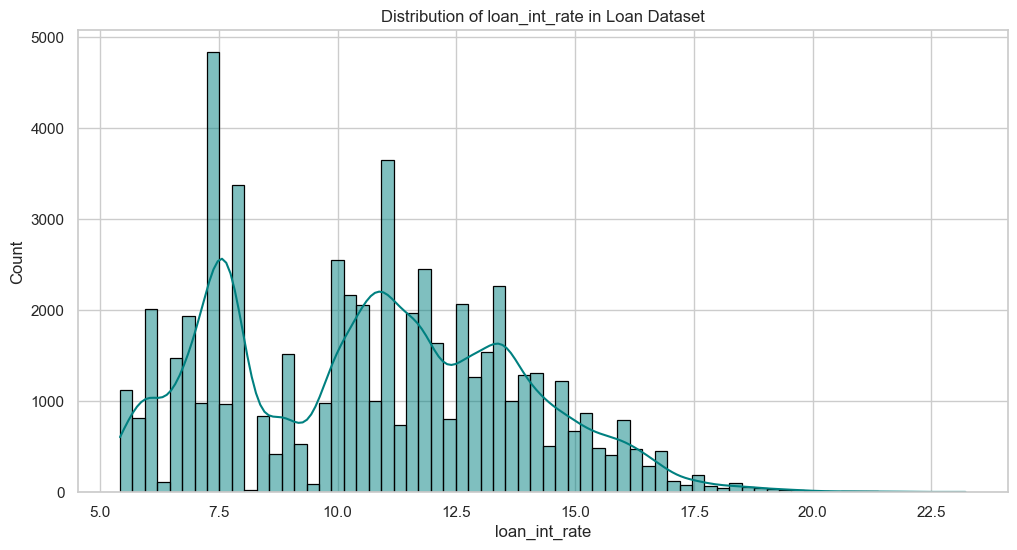

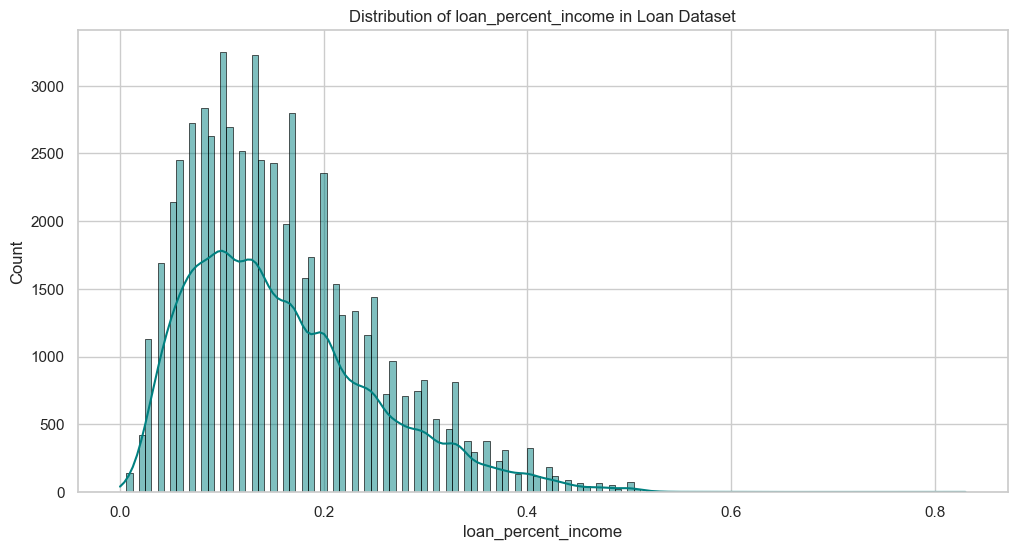

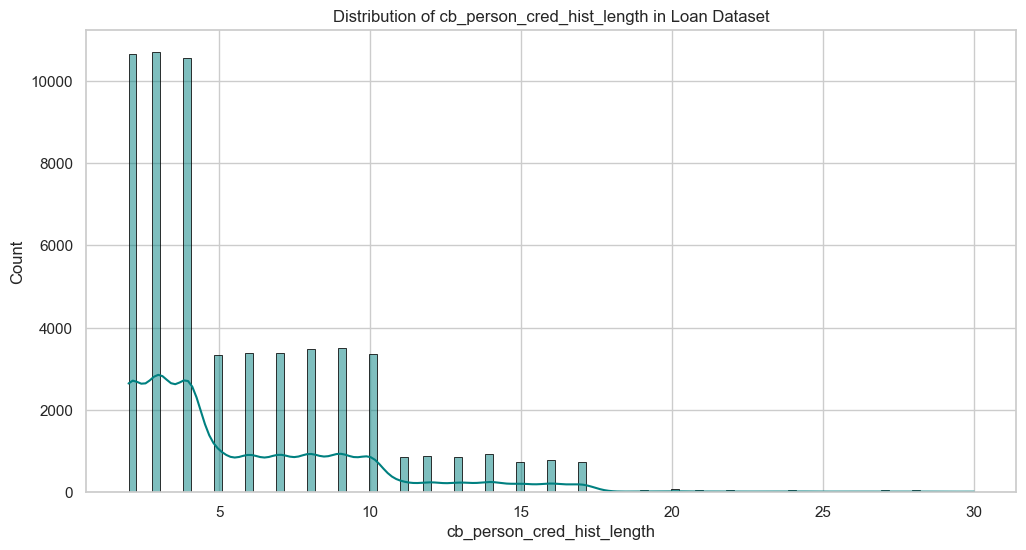

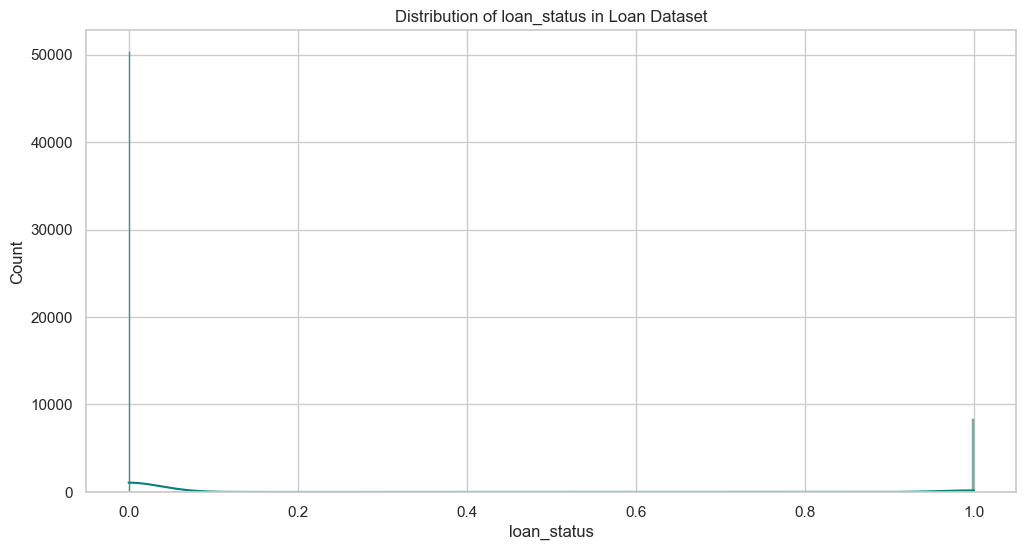

In [8]:
# Analyze distributions of numerical loan features
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, color='teal', edgecolor='black')
    plt.title(f'Distribution of {col} in Loan Dataset')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

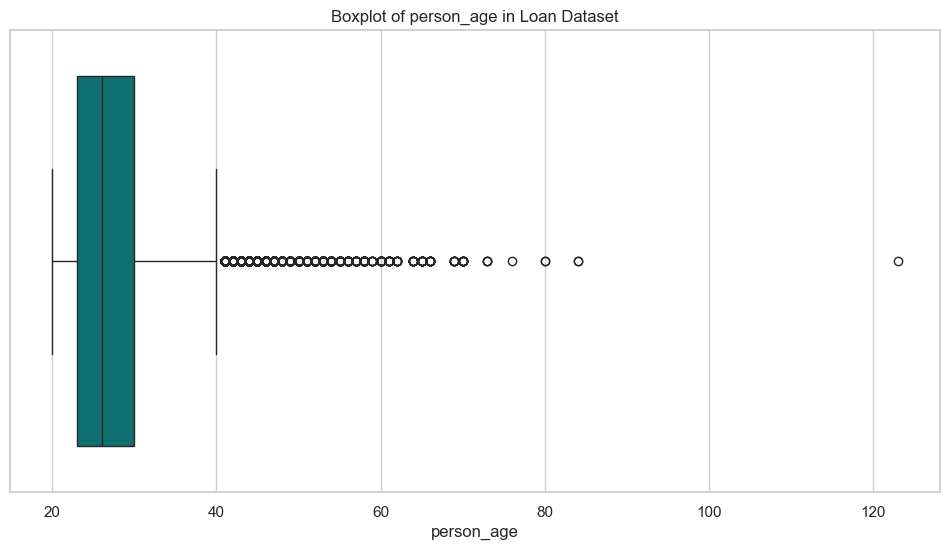

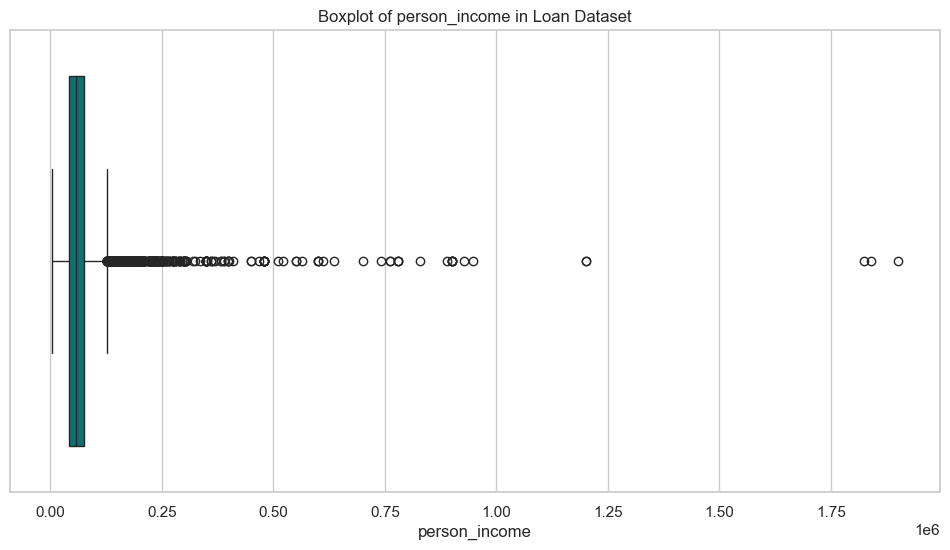

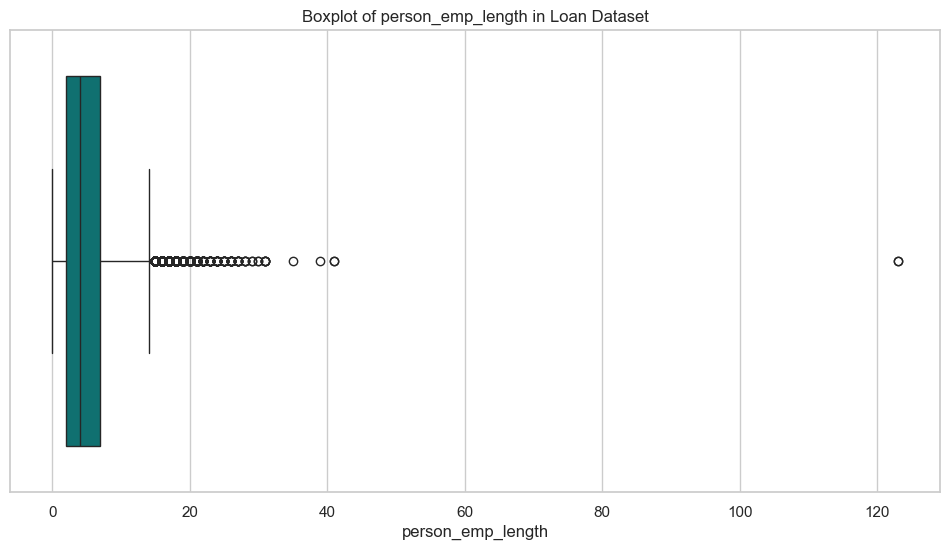

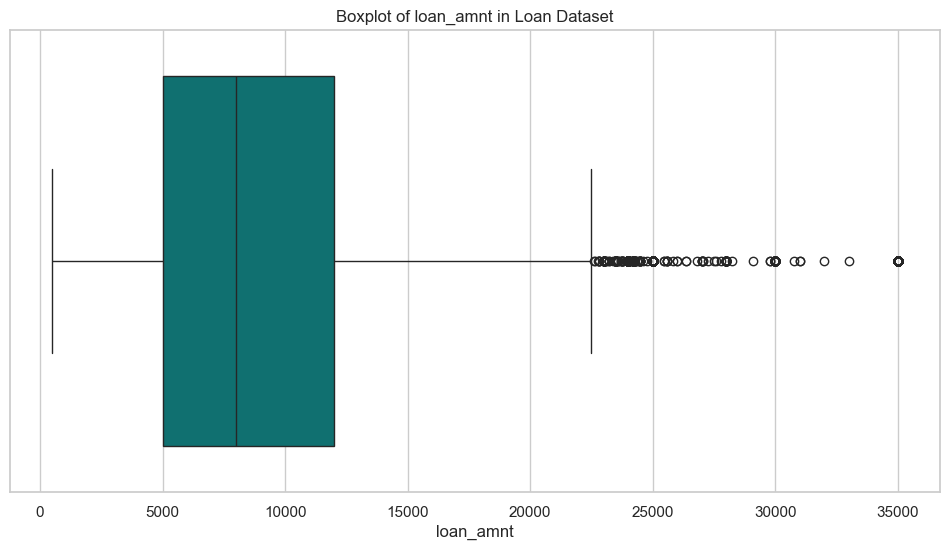

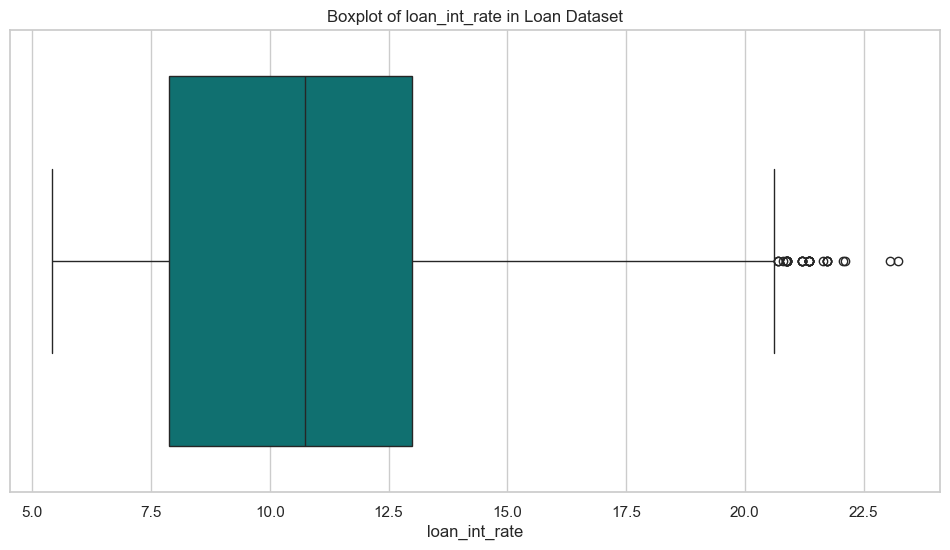

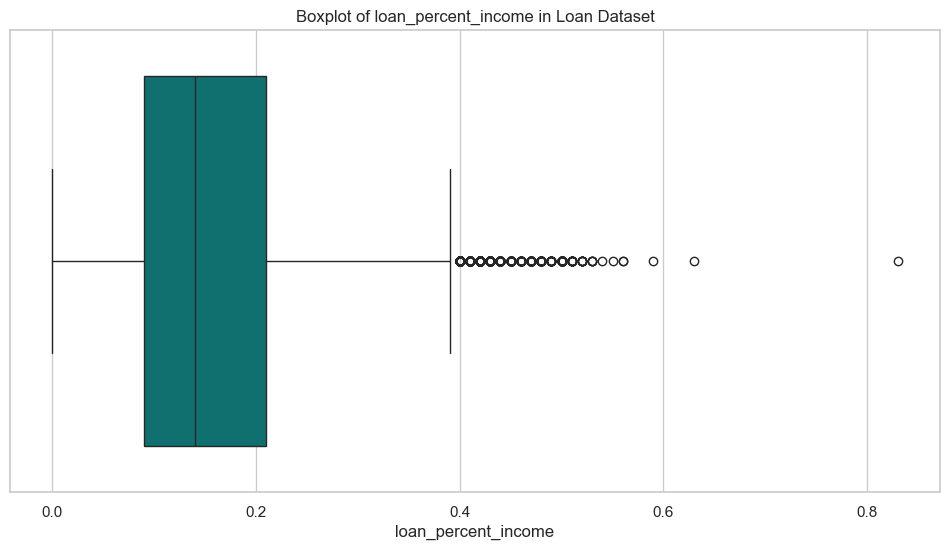

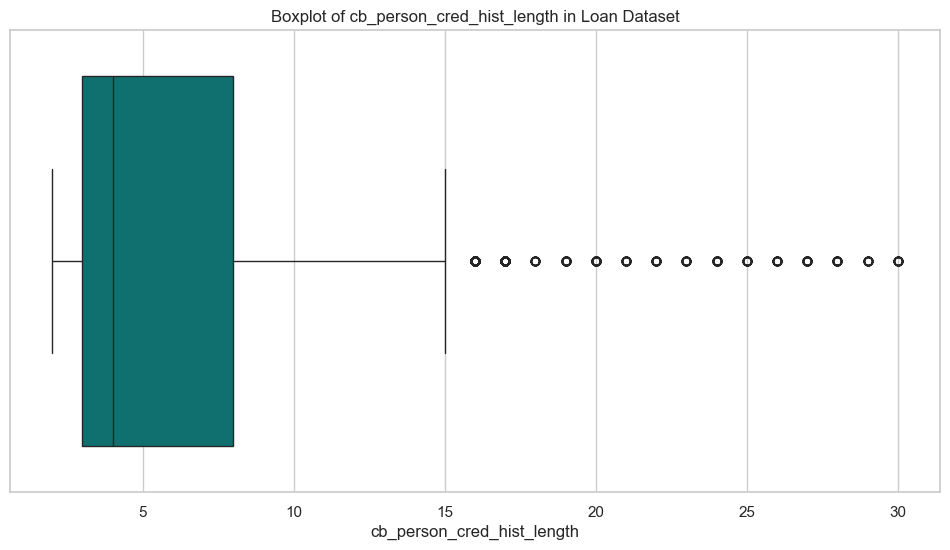

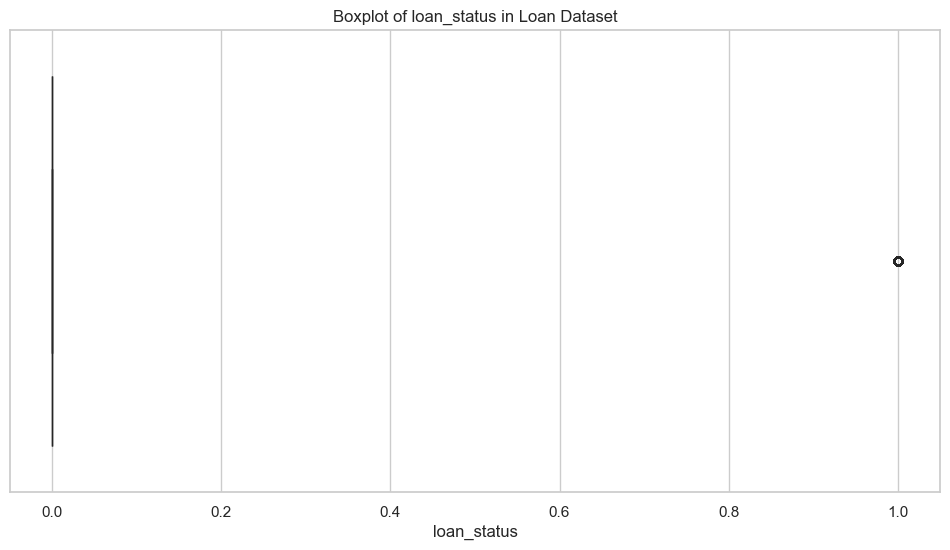

In [9]:
# Examine outliers in numerical loan features using box plots
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col], color='teal')
    plt.title(f'Boxplot of {col} in Loan Dataset')
    plt.show()

9. Analyzing Numerical Features for Outliers

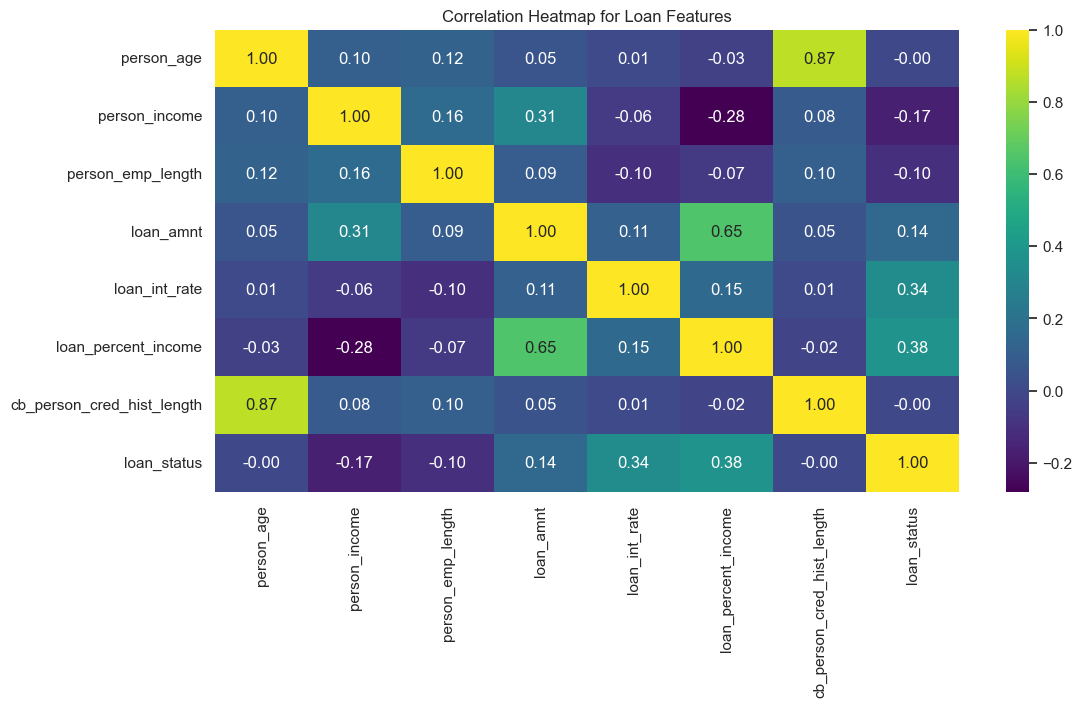

In [10]:
# Analyze correlations among numerical loan features
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap for Loan Features")
plt.show()

10. Analyzing Categorical Feature Distributions

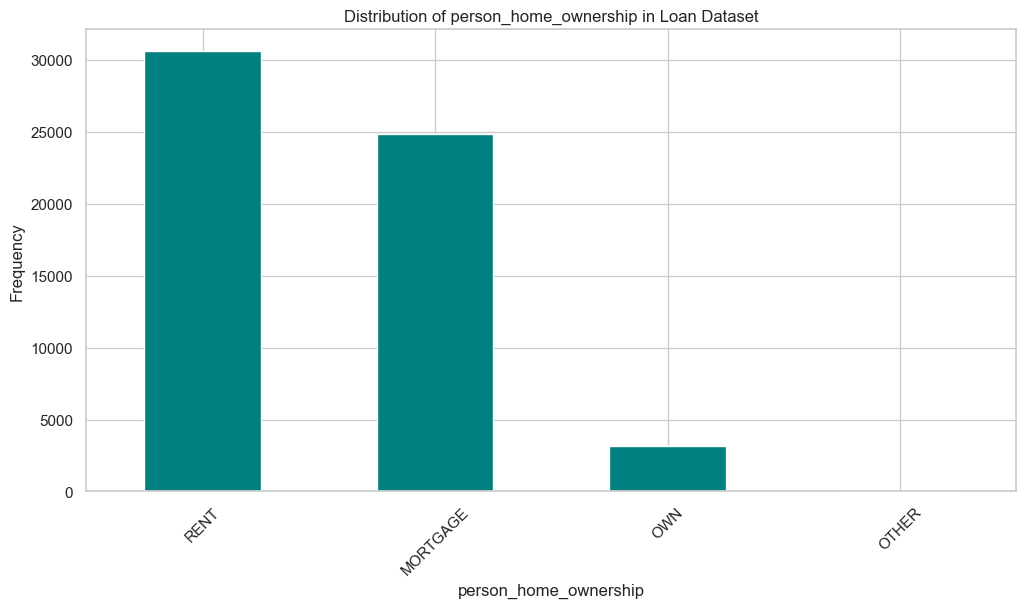

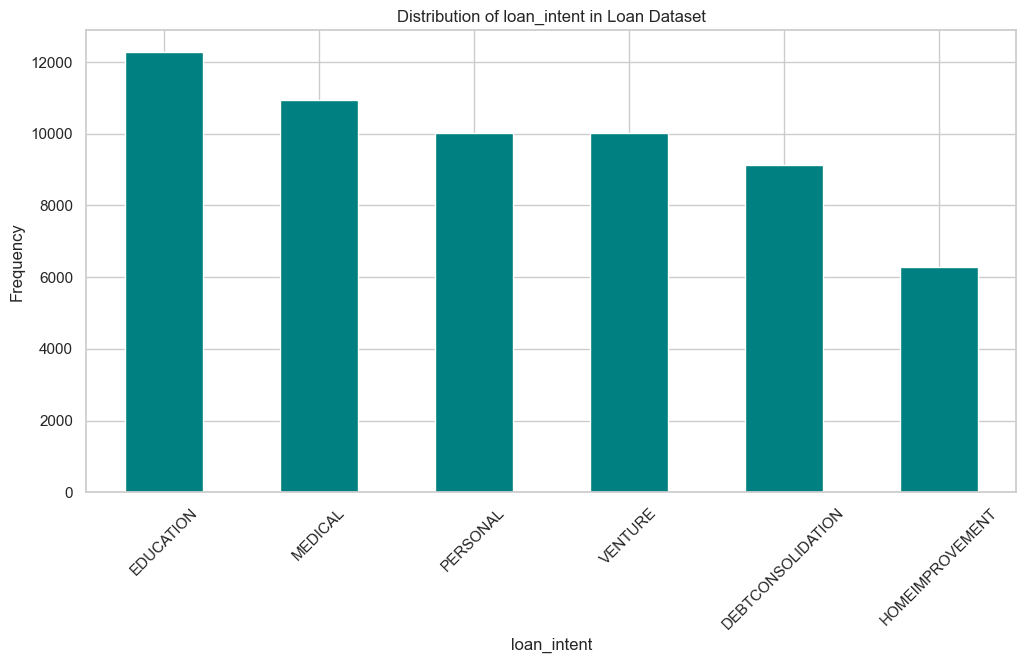

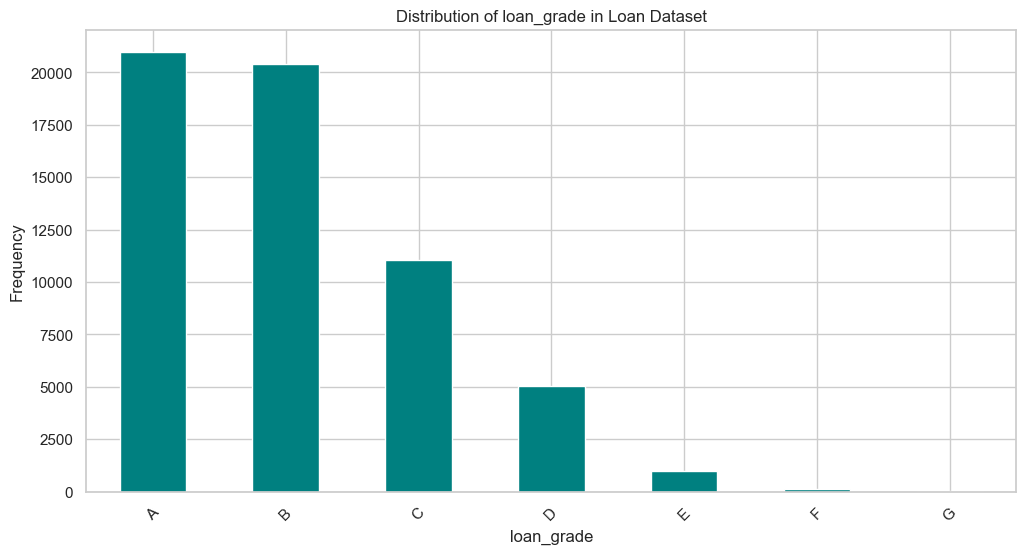

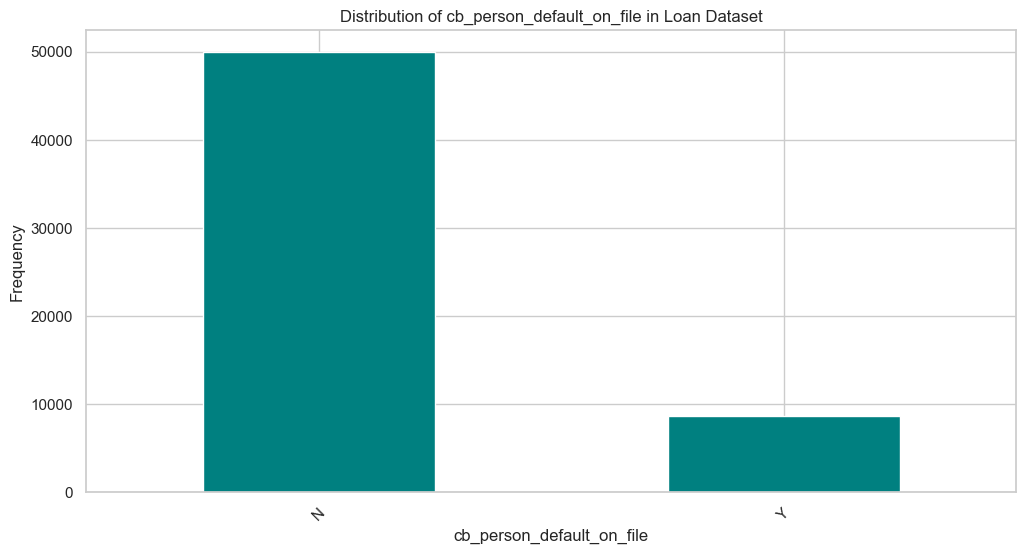

In [11]:
# Explore distributions of categorical loan features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar', color='teal')
    plt.title(f'Distribution of {col} in Loan Dataset')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

11. Splitting Dataset into Training and Testing Sets

In [12]:
# Split dataset into training and testing sets with a fixed seed for reproducibility
features_train, features_test, target_train, target_test = train_test_split(
    X,  
    y,  
    test_size=0.2,  # Allocate 20% of data for testing
    random_state=42  # Ensure consistent results across runs
)

12. Training and Evaluating SVM Classifier

In [13]:
svm_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', SVC(kernel='rbf', C=1.0))])
svm_pipeline.fit(features_train, target_train)
svm_preds = svm_pipeline.predict(features_test)
print("SVM Classifier Results:")
print(classification_report(target_test, svm_preds))

SVM Classifier Results:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.91      0.67      0.78      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.83      0.87     11729
weighted avg       0.94      0.95      0.94     11729



13. Training and Evaluating MLP Classifier with Loss and Accuracy Tracking

c:\Users\CN\anaconda3\envs\heshani\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\CN\anaconda3\envs\heshani\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\CN\anaconda3\envs\heshani\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\CN\anaconda3\envs\heshani\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\CN\anaconda3\envs\heshani\Lib\s

MLP Model Evaluation Metrics:
              precision    recall  f1-score   support

Not Approved       0.95      0.99      0.97     10087
    Approved       0.90      0.71      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.88     11729
weighted avg       0.95      0.95      0.95     11729



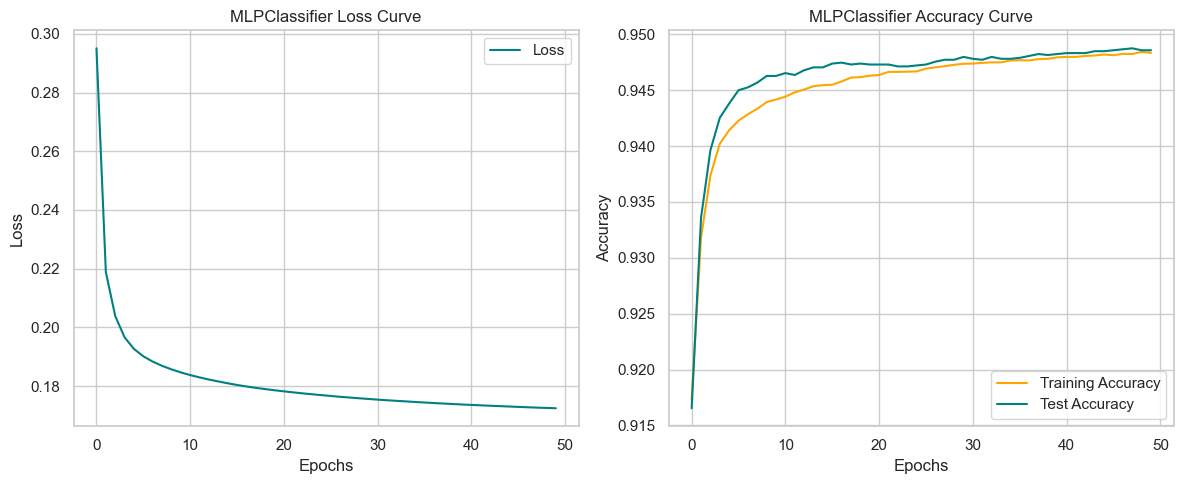

In [14]:
# Define MLP pipeline with iterative training for loss and accuracy tracking
from sklearn.metrics import accuracy_score

ml_pipeline = Pipeline([
    ('prep_stage', preprocessor),
    ('mlp_classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42))
])

n_epochs = 50
loss_values = []
train_accuracy_values = []
test_accuracy_values = []

for epoch in range(n_epochs):
    ml_pipeline.fit(features_train, target_train)  
    loss_values.append(ml_pipeline.named_steps['mlp_classifier'].loss_)
    
    # Training accuracy
    y_train_pred = ml_pipeline.predict(features_train)
    train_acc = accuracy_score(target_train, y_train_pred)
    train_accuracy_values.append(train_acc)
    
    # Test accuracy
    y_test_pred = ml_pipeline.predict(features_test)
    test_acc = accuracy_score(target_test, y_test_pred)
    test_accuracy_values.append(test_acc)

# Print classification report
print("MLP Model Evaluation Metrics:")
print(classification_report(target_test, y_test_pred, target_names=['Not Approved', 'Approved']))

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_values, color='teal', label='Loss')  # Purple for loss
plt.title("MLPClassifier Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_values, color='orange', label='Training Accuracy')  # Orange for training accuracy
plt.plot(test_accuracy_values, color='teal', label='Test Accuracy')  # Teal for test accuracy
plt.title("MLPClassifier Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

14. Training and Evaluating Decision Tree Classifier

In [15]:
# Define Decision Tree pipeline with preprocessing and classifier steps
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step (e.g., scaling or encoding features)
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))  # Decision Tree with limited depth for preventing overfitting
])

# Train the pipeline on the training datasetSSss
dt_pipeline.fit(features_train, target_train)

# Generate predictions on the test dataset
dt_preds = dt_pipeline.predict(features_test)

# Display Decision Tree classification performance metrics
print("Decision Tree Results:")
print(classification_report(target_test, dt_preds))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.90      0.67      0.77      1642

    accuracy                           0.94     11729
   macro avg       0.93      0.83      0.87     11729
weighted avg       0.94      0.94      0.94     11729



15. KMeans Clustering on Numerical Features

In [16]:
# Prepare numerical data with custom preprocessing
# Ensure numerical_cols excludes the target column (loan_status)
numerical_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'loan_status']
X_numeric = X[numerical_cols].fillna(X[numerical_cols].mean())  # Handle missing values with mean
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply KMeans clustering with custom settings
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Show initial cluster results
print("Sample KMeans Cluster Labels (first 20):", cluster_labels[:20])

Sample KMeans Cluster Labels (first 20): [2 0 0 1 0 0 1 0 2 1 1 1 0 1 0 0 1 1 0 0]


16. Training and Evaluating Random Forest Classifier

In [18]:
# Configure Random Forest pipeline with preprocessing
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the Random Forest model on the loan dataset
rf_pipeline.fit(features_train, target_train)

# Generate predictions for the test set
rf_preds = rf_pipeline.predict(features_test)

# Display Random Forest classification performance
print("Random Forest Results:")
print(classification_report(target_test, rf_preds, target_names=['Not Approved', 'Approved']))


Random Forest Results:
              precision    recall  f1-score   support

Not Approved       0.96      0.99      0.97     10087
    Approved       0.92      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



17. LightGBM Classification Pipeline

In [19]:
#Configure LightGBM pipeline with preprocessing
lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42, n_estimators=100))
])

#Train the LightGBM model on the loan dataset
lgb_pipeline.fit(features_train, target_train)

# Generate predictions for the test set
lgb_preds = lgb_pipeline.predict(features_test)

# Display LightGBM classification performance
print("LightGBM Results:")
print(classification_report(target_test, lgb_preds, target_names=['Not Approved', 'Approved']))

[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765
LightGBM Results:
              precision    recall  f1-score   support

Not Approved       0.96      0.99      0.97     10087
    Approved       0.91      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



c:\Users\CN\anaconda3\envs\heshani\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


18. Model Accuracy Comparison

In [20]:
from sklearn.metrics import accuracy_score

# Ensure this is defined before accuracy evaluation
results = ml_pipeline.predict(features_test)

# Define model predictions
model_predictions = {
    'SVM Classifier': svm_preds,
    'Neural Network': results,
    'Tree Classifier': dt_preds,
    'Forest Classifier': rf_preds,
    'Boosting Model': lgb_preds,
}

# Calculate and display accuracy
for model_name, predictions in model_predictions.items():
    accuracy = accuracy_score(target_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


SVM Classifier Accuracy: 0.9453
Neural Network Accuracy: 0.9486
Tree Classifier Accuracy: 0.9441
Forest Classifier Accuracy: 0.9525
Boosting Model Accuracy: 0.9529


19. ave Trained LightGBM Model using Pickle

In [21]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(lgb_pipeline, f)

print("Model saved as model.pkl")

Model saved as model.pkl


In [22]:
#Save to CSV exactly as shown
df.to_csv("submission.csv", index=False)

#Confirm output format
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          37          35000                  RENT                0.0   
1          22          56000                   OWN                6.0   
2          29          28800                   OWN                8.0   
3          30          70000                  RENT               14.0   
4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N            